In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [3]:
df = pd.read_csv("Data/Iris.csv",  index_col=[0])
df = df[df['class label'] != 'Iris-setosa'].reset_index(drop=True)
df.head(2)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor


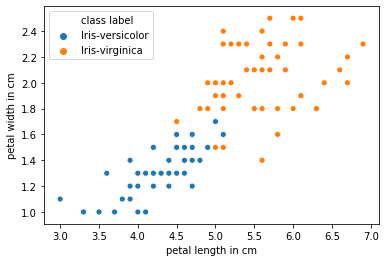

In [11]:
sns.scatterplot(df['petal length in cm'], df['petal width in cm'], hue = df['class label'])

In [55]:
class lda:
    def __init__(self):
        self.df = df
        self.X = self.df.iloc[:,:-1].values
        self.y = self.df.iloc[:,-1].values
        self.y = self.encode()
        self.X1 = self.X[self.y == 1]
        self.X2 = self.X[self.y == 2]
    
    def encode(self):
        from sklearn.preprocessing import LabelEncoder
        enc = LabelEncoder()
        label_encoder = enc.fit(self.y)
        self.y = label_encoder.transform(self.y) + 1
        return self.y
    
    def create_matrices(self):
        # Sb
        self.mu1 = np.mean(self.X1, axis=0).reshape(-1, 1)
        self.mu2 = np.mean(self.X2, axis=0).reshape(-1, 1)
        self.Sb = (self.mu1 - self.mu2)@(self.mu1 - self.mu2).T

        # Sw
        S1 = (self.X1 - self.mu1.T).T@ (self.X1 - self.mu1.T)/ (len(self.X1)-1)
        S2 = (self.X2 - self.mu2.T).T@ (self.X2 - self.mu2.T)/ (len(self.X2)-1)
        self.Sw = S1 + S2
        return self.Sb, self.Sw

    def extract_eigen_values(self):
        self.Sb, self.Sw = self.create_matrices()
        self.w = np.linalg.eig(np.linalg.inv(self.Sw)@self.Sb)
        self.eigen_values = self.w[0] 
        self.eigen_vectors = self.w[1]
        self.eigen_pairs = [(self.eigen_values[i], self.eigen_vectors[:,i]) for i in range(len(self.eigen_values))]
        self.eigen_pairs = sorted(self.eigen_pairs, key = lambda x:x[0], reverse = True)
        self.W = np.hstack((self.eigen_pairs[0][1].reshape(self.X1.shape[1],1), self.eigen_pairs[1][1].reshape(self.X1.shape[1],1)))
        return self.W

    def fit(self, df):
        self.W = self.extract_eigen_values()
        self.X_lda = self.X.dot(self.W)
        return self.X_lda


In [56]:
lda_class = lda()
X_lda_c = lda_class.fit(df)

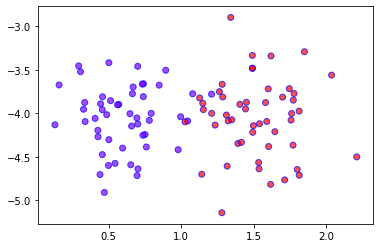

In [54]:
import matplotlib.pyplot as plt
# X_lda_c = np.array(X.dot(W))
plt.scatter(
    X_lda_c[:,0],
    X_lda_c[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [45]:
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, :4].values
y = df['class label'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
# label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

In [46]:
# Build SW, SB
X1 = X[y==1]
X2 = X[y==2]
mu1 = np.mean(X1, axis = 0).reshape(-1,1)
mu2 = np.mean(X2, axis = 0).reshape(-1,1)
Sb = (mu1 - mu2)@(mu1 - mu2).T
S1 = (X1 - mu1.T).T@(X1 - mu1.T)/(len(X1)-1)
S2 = (X2 - mu2.T).T@(X2 - mu2.T)/(len(X2)-1)
Sw = S1 + S2

In [47]:
w = np.linalg.eig(np.linalg.inv(Sw)@Sb)
evectors = w[1]#[:,0].reshape(-1,1)
print(f"Eigen Vectors : {evectors}")
evalues = w[0]#[0]
print(f"Eigen Values : {evalues}")

Eigen Vectors : [[-0.8567537  -0.22684996 -0.32074248  0.27347097]
 [-0.18843348 -0.35584988  0.88142201 -0.95501428]
 [ 0.23543551  0.44461153 -0.14735684 -0.04450296]
 [ 0.41837309  0.79008262  0.31385579  0.10573951]]
Eigen Values : [ 0.00000000e+00  7.10944290e+00 -1.44462661e-16 -1.48701626e-15]


In [48]:
pairs = [(np.abs(evalues[i]), evectors[:,i]) for i in range(len(evalues))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])
W = np.hstack((pairs[0][1].reshape(X1.shape[1],1), pairs[1][1].reshape(X1.shape[1],1))).real
print(pairs)

7.109442903981117
1.4870162583777302e-15
1.444626610624217e-16
0.0
[(7.109442903981117, array([-0.22684996, -0.35584988,  0.44461153,  0.79008262])), (1.4870162583777302e-15, array([ 0.27347097, -0.95501428, -0.04450296,  0.10573951])), (1.444626610624217e-16, array([-0.32074248,  0.88142201, -0.14735684,  0.31385579])), (0.0, array([-0.8567537 , -0.18843348,  0.23543551,  0.41837309]))]


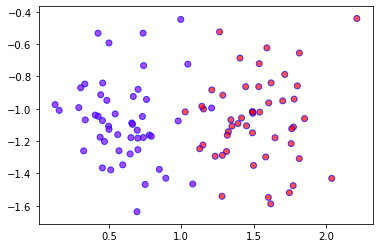

In [36]:
import matplotlib.pyplot as plt
X_lda = np.array(X.dot(W))
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',

    alpha=0.7,
    edgecolors='b'
)

The histogram tells, petal length & petal width alone can differentiate the classes without LDA based dimensionality reduction. 

LDA Assumptions :
1.Data is normally distributed.     
2. Features are statistically independent & identical covariance matrix for each class

## Step 1 : Compute feature mean of all class

In [9]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



In [10]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


In [11]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


In [12]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
print(eig_vals)
print(eig_vecs)

[3.2272e+01 2.7757e-01 3.4225e-15 1.1483e-14]
[[-0.2049 -0.009  -0.8844 -0.2234]
 [-0.3871 -0.589   0.2854 -0.2523]
 [ 0.5465  0.2543  0.258  -0.326 ]
 [ 0.7138 -0.767   0.2643  0.8833]]


In [13]:
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.2049]
 [-0.3871]
 [ 0.5465]
 [ 0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.8844]
 [ 0.2854]
 [ 0.258 ]
 [ 0.2643]]
Eigenvalue 3: 3.42e-15

Eigenvector 4: 
[[-0.2234]
 [-0.2523]
 [-0.326 ]
 [ 0.8833]]
Eigenvalue 4: 1.15e-14


In [14]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972981
0.27756686384003953
1.1483362279322388e-14
3.422458920849769e-15


In [19]:
eig_pairs

[(32.27195779972981, array([-0.2049, -0.3871,  0.5465,  0.7138])),
 (0.27756686384003953, array([-0.009 , -0.589 ,  0.2543, -0.767 ])),
 (1.1483362279322388e-14, array([-0.2234, -0.2523, -0.326 ,  0.8833])),
 (3.422458920849769e-15, array([-0.8844,  0.2854,  0.258 ,  0.2643]))]

In [20]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [23]:
eig_pairs[0][1]

array([-0.2049, -0.3871,  0.5465,  0.7138])

In [22]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2049 -0.009 ]
 [-0.3871 -0.589 ]
 [ 0.5465  0.2543]
 [ 0.7138 -0.767 ]]


In [24]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

In [ ]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')